## F1 score on bigrams

In [1]:
import json
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu, SmoothingFunction
import csv

# Load the JSON data
with open('adaResults.json', 'r') as json_file:
    data = json.load(json_file)

csv_data = []

# Initialize lists to store BLEU scores
bleu_scores_1 = []
bleu_scores_2 = []
bleu_scores_3 = []

# Create a SmoothingFunction for BLEU
smoothing_function = SmoothingFunction()

# Iterate through the data
for entry in data:
    author_name = entry["name"]
    existing_text = entry["existing_text2"]
    generated_text1 = entry["generated_text1"]
    generated_text2 = entry["generated_text2"]
    generated_text3 = entry["generated_text3"]

    # Tokenize the texts (you can use a more advanced tokenizer if needed)
    existing_text_tokens = existing_text.split()
    generated_text1_tokens = generated_text1.split()
    generated_text2_tokens = generated_text2.split()
    generated_text3_tokens = generated_text3.split()

    # Calculate BLEU scores with smoothing
    bleu_score_1 = sentence_bleu([existing_text_tokens], generated_text1_tokens, smoothing_function=smoothing_function.method1)
    bleu_score_2 = sentence_bleu([existing_text_tokens], generated_text2_tokens, smoothing_function=smoothing_function.method1)
    bleu_score_3 = sentence_bleu([existing_text_tokens], generated_text3_tokens, smoothing_function=smoothing_function.method1)

    # Append the scores to the respective lists
    bleu_scores_1.append(bleu_score_1)
    bleu_scores_2.append(bleu_score_2)
    bleu_scores_3.append(bleu_score_3)

    # Append data to the CSV list and format the scores
    csv_data.append([author_name, "{:.4f}".format(bleu_score_1), "{:.4f}".format(bleu_score_2), "{:.4f}".format(bleu_score_3)])

# Define the CSV file name
csv_filename = "bleu_scores.csv"

# Write the data to the CSV file
with open(csv_filename, mode='w', newline='') as csv_file:
    fieldnames = ["Author Name", "BLEU_1", "BLEU_2", "BLEU_3"]
    writer = csv.writer(csv_file)
    
    # Write the header row
    writer.writerow(fieldnames)
    
    # Write the data rows
    writer.writerows(csv_data)

print(f"CSV file '{csv_filename}' created successfully.")


CSV file 'bleu_scores.csv' created successfully.


NameError: name 'corpus_bleu_score_1' is not defined

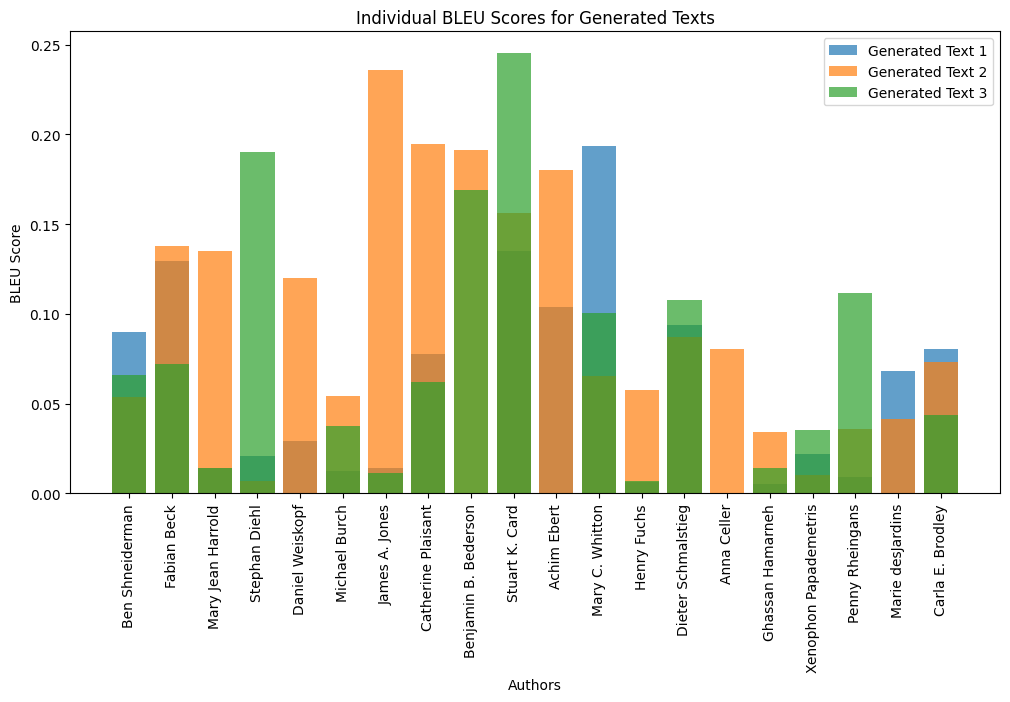

In [2]:
import matplotlib.pyplot as plt

# Create a bar chart for individual BLEU scores
authors = [entry["name"] for entry in data]
plt.figure(figsize=(12, 6))
plt.bar(authors, bleu_scores_1, label="Generated Text 1", alpha=0.7)
plt.bar(authors, bleu_scores_2, label="Generated Text 2", alpha=0.7)
plt.bar(authors, bleu_scores_3, label="Generated Text 3", alpha=0.7)
plt.xlabel("Authors")
plt.ylabel("BLEU Score")
plt.title("Individual BLEU Scores for Generated Texts")
plt.xticks(rotation=90)
plt.legend()

# Create a line chart for corpus-level BLEU scores
generated_text_labels = ["Generated Text 1", "Generated Text 2", "Generated Text 3"]
corpus_bleu_scores = [corpus_bleu_score_1, corpus_bleu_score_2, corpus_bleu_score_3]
plt.figure(figsize=(8, 4))
for i in range(3):
    plt.plot(generated_text_labels[i], corpus_bleu_scores[i], marker='o', label=generated_text_labels[i])
plt.xlabel("Generated Text")
plt.ylabel("Corpus BLEU Score")
plt.title("Corpus-Level BLEU Scores for Generated Texts")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [3]:
# Calculate corpus-level BLEU scores , 
# This involves comparing the entire set of generated texts for each author to the reference texts for all authors.
corpus_bleu_score_1 = corpus_bleu([[existing_text.split()] for entry in data], [generated_text1.split() for entry in data])
corpus_bleu_score_2 = corpus_bleu([[existing_text.split()] for entry in data], [generated_text2.split() for entry in data])
corpus_bleu_score_3 = corpus_bleu([[existing_text.split()] for entry in data], [generated_text3.split() for entry in data])

print("\nCorpus BLEU Scores:")
print("Generated Text 1 (Corpus):", corpus_bleu_score_1)
print("Generated Text 2 (Corpus):", corpus_bleu_score_2)
print("Generated Text 3 (Corpus):", corpus_bleu_score_3)


Corpus BLEU Scores:
Generated Text 1 (Corpus): 0.08018081600058616
Generated Text 2 (Corpus): 0.07343660663917347
Generated Text 3 (Corpus): 0.04343605980834314
